# data cleaning and EDA

In [ ]:
!pip install xgboost

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
df.shape[1]

13

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [ ]:
binary_col = [col for col in df.columns if len(df[col].unique())==2]
binary_col

['cb_person_default_on_file', 'loan_status']

In [ ]:
binary_col_test = [col for col in df_test.columns if len(df_test[col].unique())==2]
binary_col_test

['cb_person_default_on_file']

In [ ]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [ ]:
df_test.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,78193.500000,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,11286.764749,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,58645.000000,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,68419.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,78193.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,87967.750000,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,97742.000000,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


In [ ]:
df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df_test.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df[df.duplicated()]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [ ]:
df_test[df_test.duplicated()]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [ ]:
df["loan_status"].value_counts(normalize = True)

,proportion
loan_status,
0,0.857618
1,0.142382


In [ ]:
df = df.drop("id" , axis = 1)

Checking outlier

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


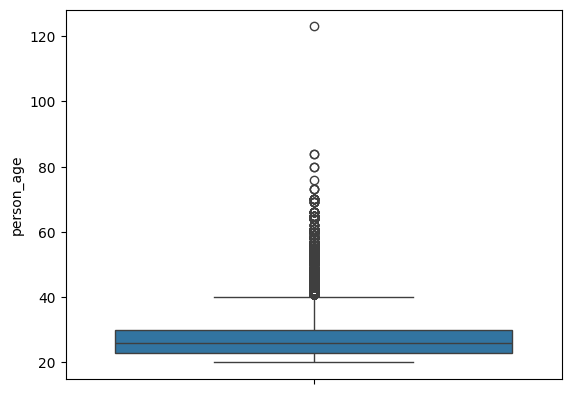

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


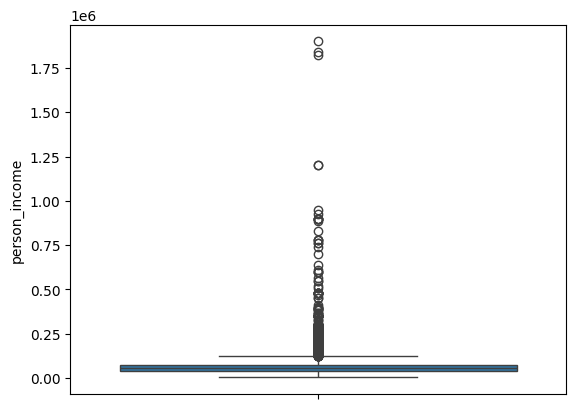

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


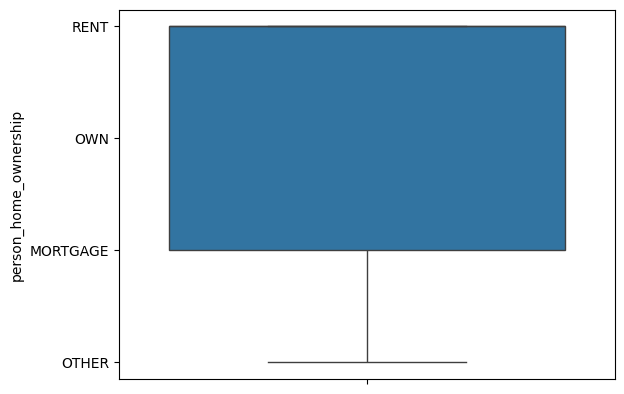

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


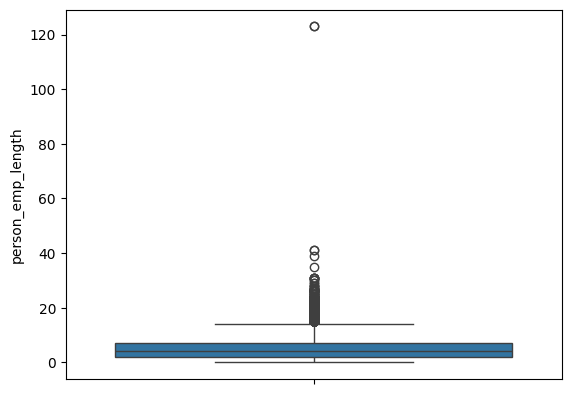

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


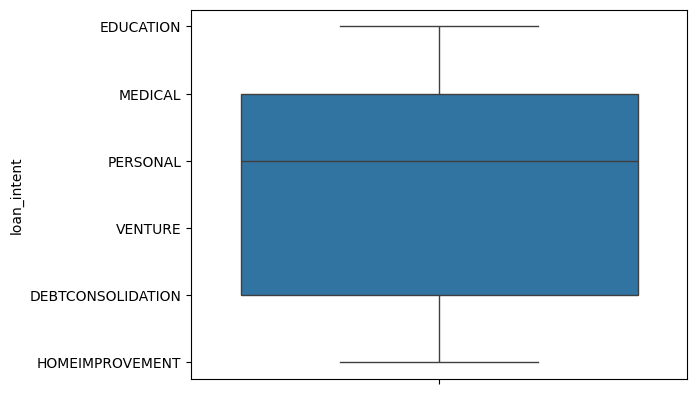

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


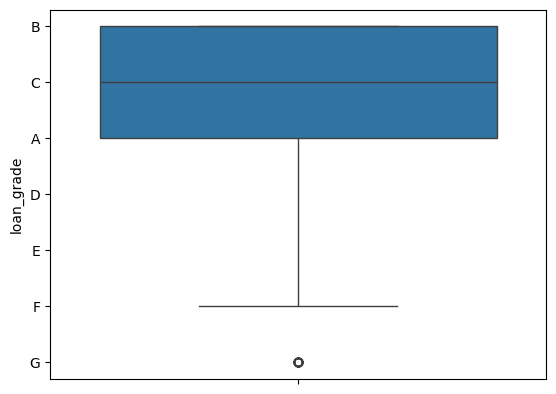

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


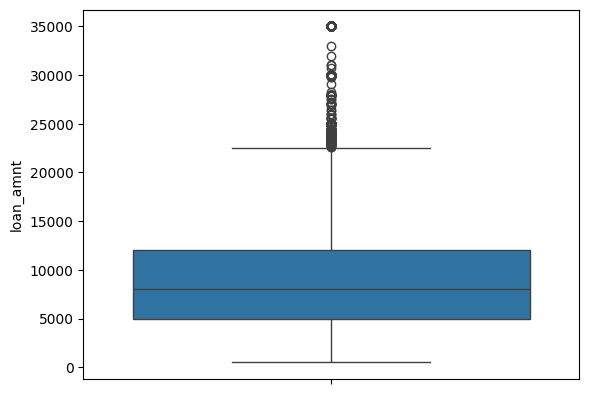

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


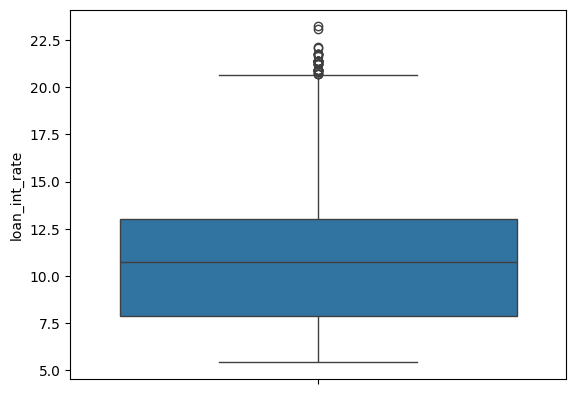

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


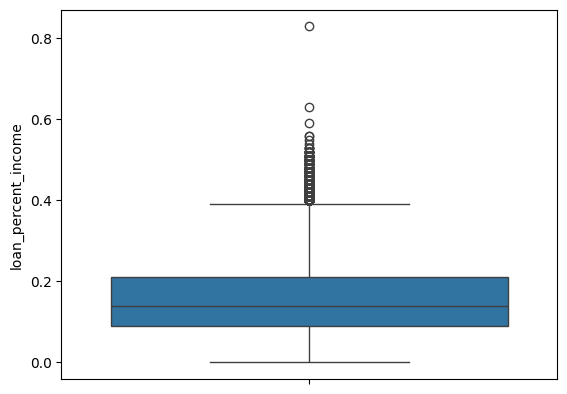

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


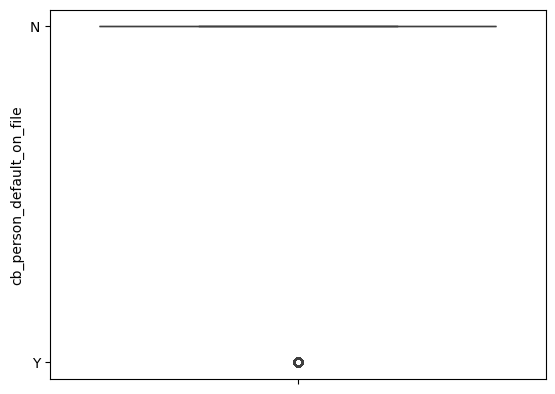

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


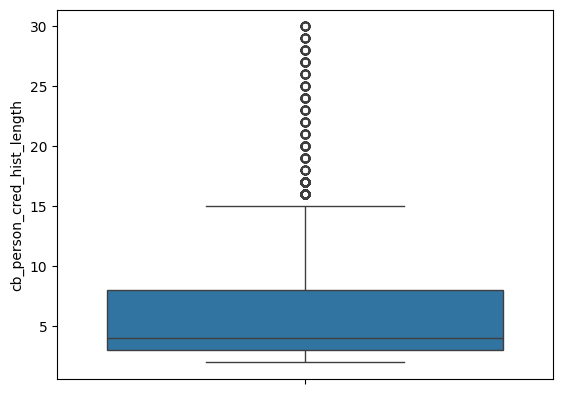

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


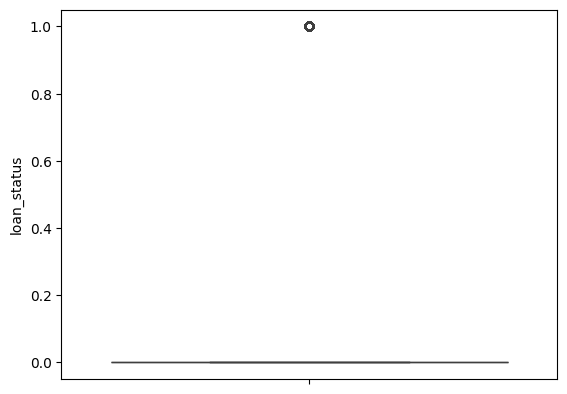

In [ ]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

# EDA on numerical


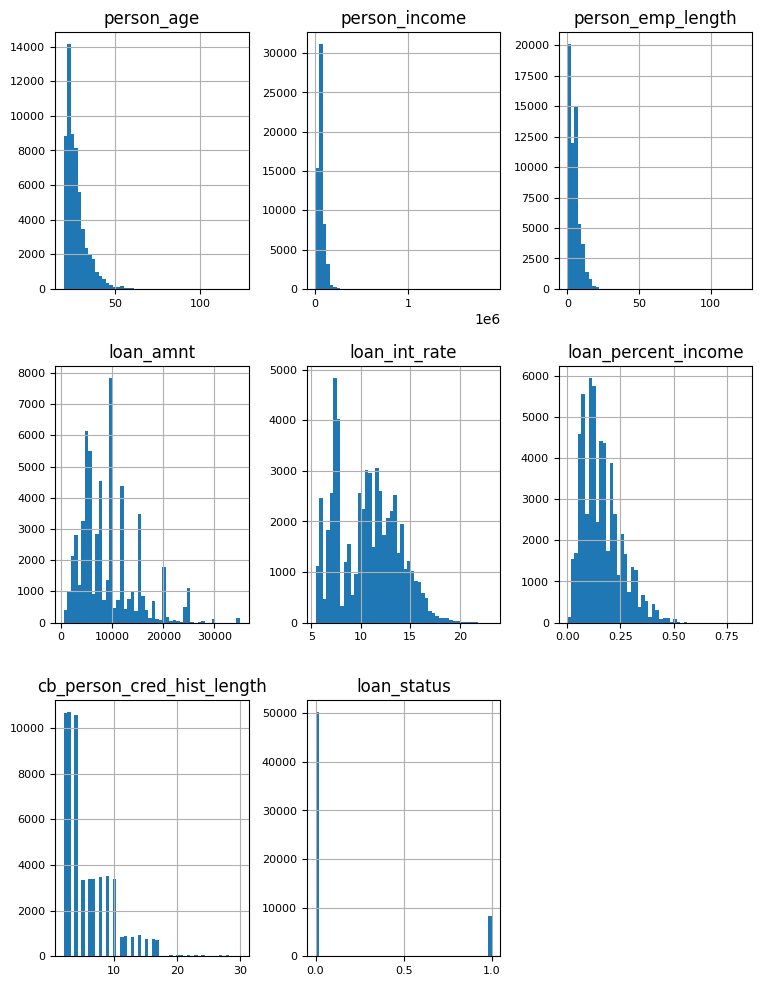

In [ ]:
df_num = df.select_dtypes(include=['float64','int64'])

df_num.hist(figsize=(9, 12), bins=50, xlabelsize=8, ylabelsize=8);

<Axes: >

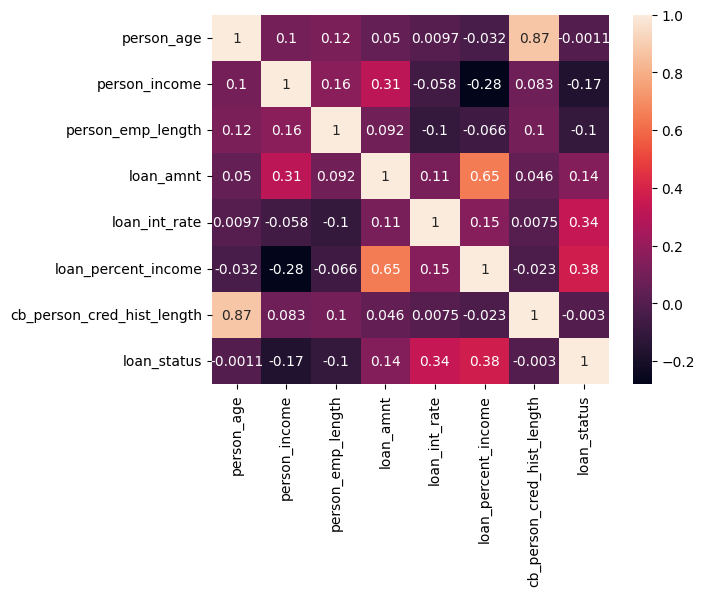

In [ ]:
sns.heatmap(df_num.corr(), annot = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


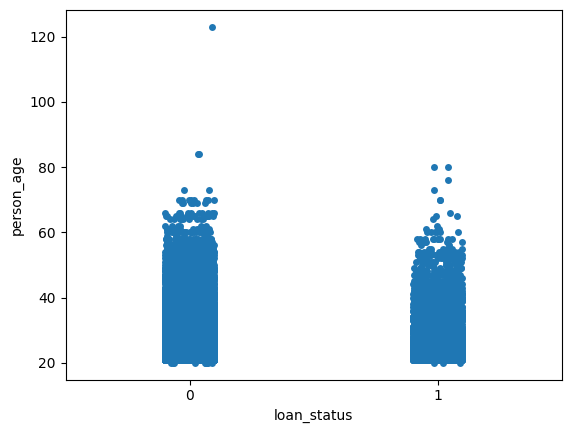

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


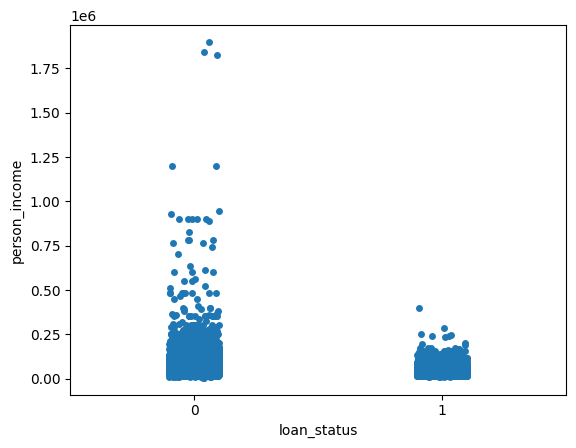

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


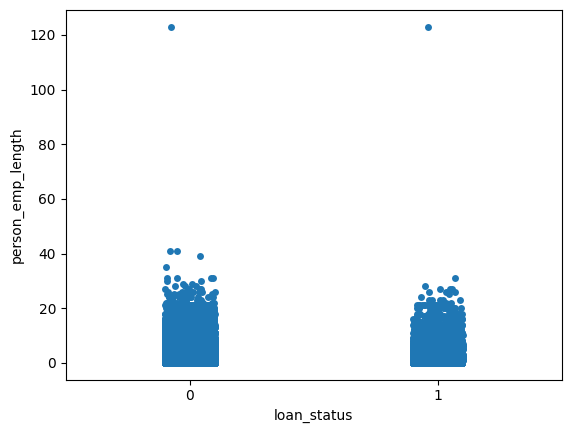

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


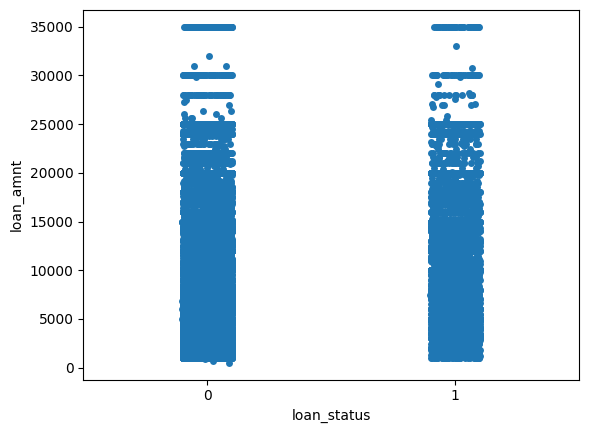

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


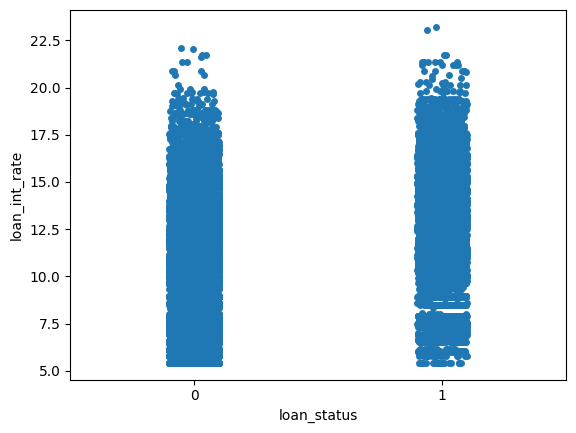

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


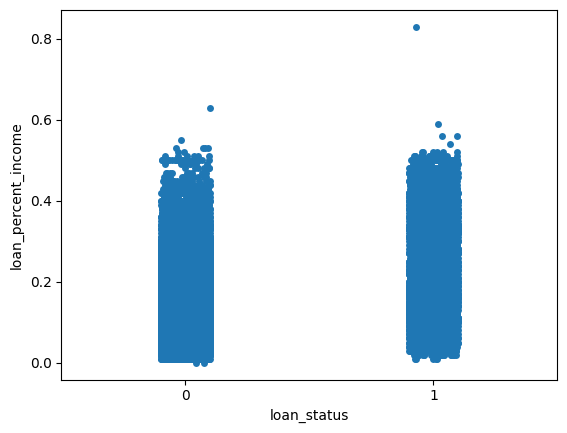

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


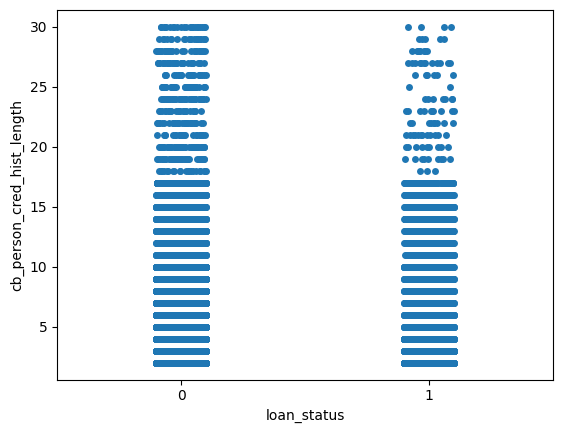

In [ ]:
for col in df_num.columns[:-1]:
  sns.stripplot(x = df_num['loan_status'].astype('category'), y= df_num[col])
  plt.show()

# EDA on Categorical


In [ ]:
cat_var = df.select_dtypes(include=['object']).columns


## bivariate analysis for categorical

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


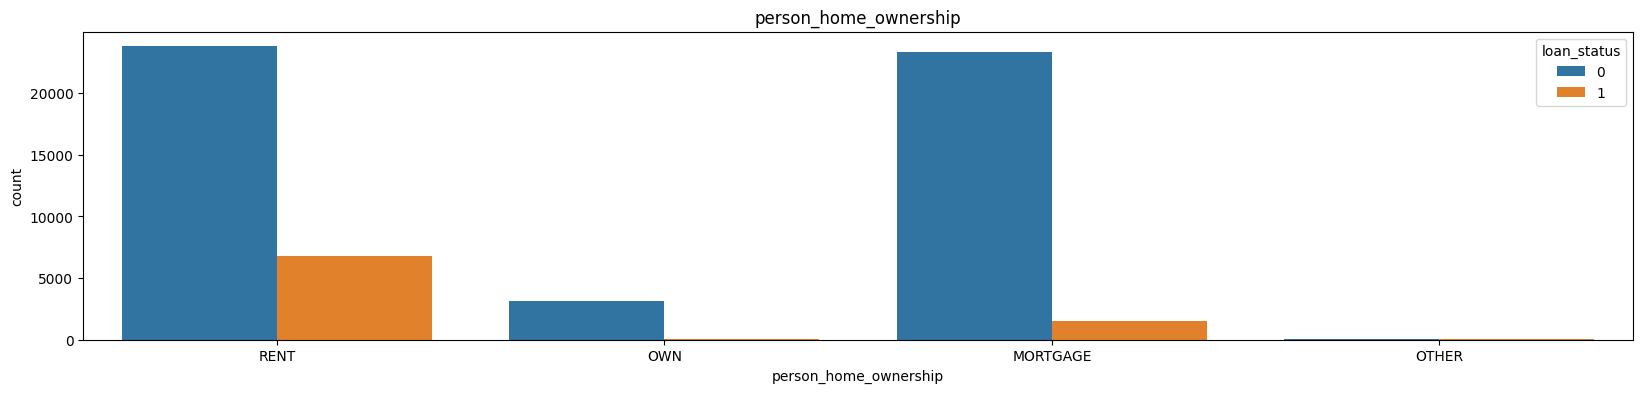

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


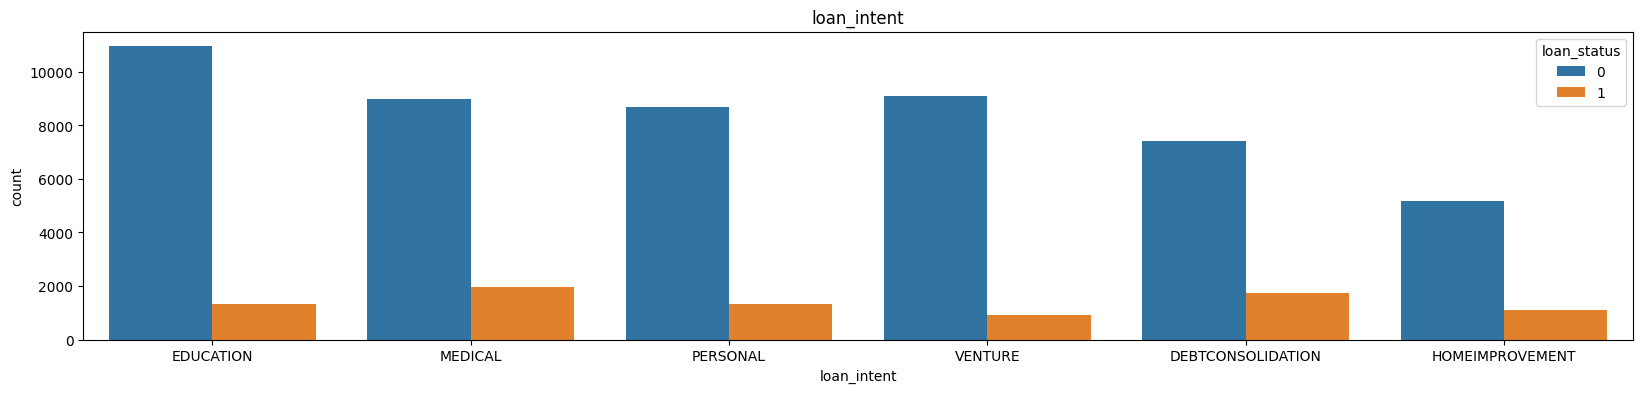

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


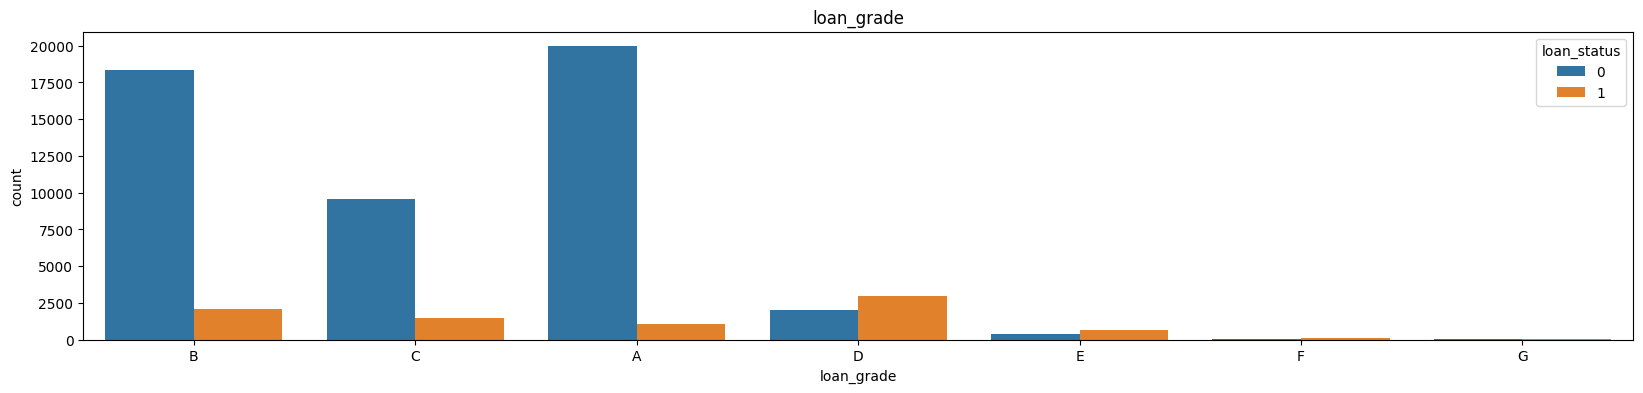

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


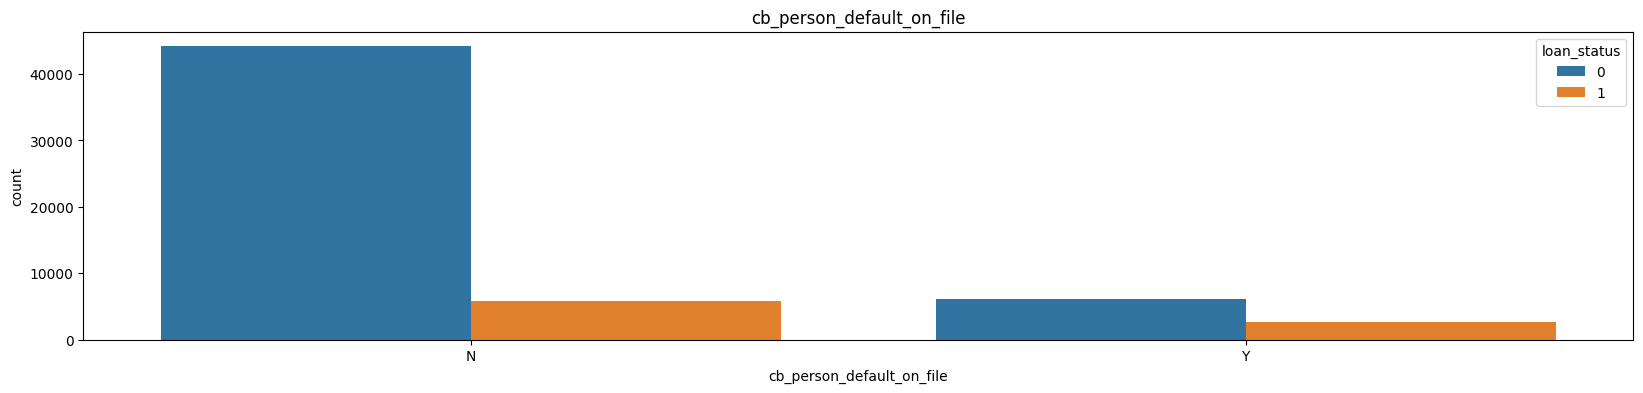

In [ ]:

# plotting bar chart for each categorical variable
for var in cat_var:
  plt.figure(figsize=(20,4))
  sns.countplot(x = df[var], hue = df['loan_status'])
  plt.title(var)
  plt.show()


Dari bivariate analysis disimpulkan
1. kebanyakan orang yang meminjam uang merental rumah
2. kebanyakan peminjaman disetujui jika tujuannya untuk edukasi
3. semakin tinggi loan_grade maka persentase loan nya semakin besar.
4. orang yang membayar loan sebelumnya cenderung lebih disetujui untuk meminjam lagi

# Feature engineering

## numerical feature interaction

polynomial features

## Categorical Encoding

In [ ]:
df_no_enc = df.copy()
df_test_no_enc = df_test.copy()
cat_col = df.select_dtypes(include=['object']).columns

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


one hot encoding for loan_intent and person_home_ownership

In [ ]:
df = pd.get_dummies(df,columns = ["loan_intent", "person_home_ownership"])
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,37,35000,0.0,B,6000,11.49,0.17,N,14,0,False,True,False,False,False,False,False,False,False,True
1,22,56000,6.0,C,4000,13.35,0.07,N,2,0,False,False,False,True,False,False,False,False,True,False
2,29,28800,8.0,A,6000,8.90,0.21,N,10,0,False,False,False,False,True,False,False,False,True,False
3,30,70000,14.0,B,12000,11.11,0.17,N,5,0,False,False,False,False,False,True,False,False,False,True
4,22,60000,2.0,A,6000,6.92,0.10,N,3,0,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,D,25000,15.95,0.21,Y,10,0,False,True,False,False,False,False,True,False,False,False
58641,28,28800,0.0,C,10000,12.73,0.35,N,8,1,False,False,False,True,False,False,False,False,False,True
58642,23,44000,7.0,D,6800,16.00,0.15,N,2,1,False,True,False,False,False,False,False,False,False,True
58643,22,30000,2.0,A,5000,8.90,0.17,N,3,0,False,True,False,False,False,False,False,False,False,True


In [ ]:
df_test = pd.get_dummies(df_test,columns = ["loan_intent", "person_home_ownership"])
df_test

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,58645,23,69000,3.0,F,25000,15.76,0.36,N,2,False,False,True,False,False,False,False,False,False,True
1,58646,26,96000,6.0,C,10000,12.68,0.10,Y,4,False,False,False,False,True,False,True,False,False,False
2,58647,26,30000,5.0,E,4000,17.19,0.13,Y,2,False,False,False,False,False,True,False,False,False,True
3,58648,33,50000,4.0,A,7000,8.90,0.14,N,7,True,False,False,False,False,False,False,False,False,True
4,58649,26,102000,8.0,D,15000,16.32,0.15,Y,4,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,2.0,B,3000,10.37,0.10,N,4,True,False,False,False,False,False,True,False,False,False
39094,97739,22,48000,6.0,A,7000,6.03,0.15,N,3,False,True,False,False,False,False,True,False,False,False
39095,97740,51,60000,0.0,A,15000,7.51,0.25,N,25,False,False,False,False,True,False,True,False,False,False
39096,97741,22,36000,4.0,D,14000,15.62,0.39,Y,4,False,False,False,False,True,False,True,False,False,False


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

le = OrdinalEncoder()
df["loan_grade"] = le.fit_transform(df["loan_grade"].values.reshape(-1,1))
df["cb_person_default_on_file"] = le.fit_transform(df["cb_person_default_on_file"].values.reshape(-1,1))

In [ ]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,37,35000,0.0,1.0,6000,11.49,0.17,0.0,14,0,False,True,False,False,False,False,False,False,False,True
1,22,56000,6.0,2.0,4000,13.35,0.07,0.0,2,0,False,False,False,True,False,False,False,False,True,False
2,29,28800,8.0,0.0,6000,8.90,0.21,0.0,10,0,False,False,False,False,True,False,False,False,True,False
3,30,70000,14.0,1.0,12000,11.11,0.17,0.0,5,0,False,False,False,False,False,True,False,False,False,True
4,22,60000,2.0,0.0,6000,6.92,0.10,0.0,3,0,False,False,False,True,False,False,False,False,False,True


In [ ]:
df_test["loan_grade"] = le.fit_transform(df_test["loan_grade"].values.reshape(-1,1))
df_test["cb_person_default_on_file"] = le.fit_transform(df_test["cb_person_default_on_file"].values.reshape(-1,1))

In [ ]:
df_test["loan_grade"].value_counts()

,count
loan_grade,
0.0,14005
1.0,13604
2.0,7460
3.0,3269
4.0,637
5.0,105
6.0,18


# splitting data


In [ ]:
x = df.drop("loan_status", axis = 1)
y = df["loan_status"]
y.value_counts()

,count
loan_status,
0,50295
1,8350


In [ ]:
X = df_test.copy()
X.drop("id", axis = 1, inplace = True)

# Creating Pipeline and Model

In [ ]:
from sklearn.pipeline import make_pipeline
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)


In [ ]:
def evaluation_metrics(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {roc_auc}")
    print(f"Confusion Matrix:\n {conf_matrix}")
    print(f"Classification Report:\n {class_report}")

## params

In [ ]:
hgb_params = {
    'l2_regularization': 99.2693448122504,
    'learning_rate': 0.08841186516713591,
    'max_depth': 166,
    'max_iter': 2195,
    'max_leaf_nodes': 27,
    'min_samples_leaf': 153,
    'random_state': 1859
}

gb_params = {
    'learning_rate': 0.08833803004190711,
    'max_depth': 43,
    'max_features': 0.9108379326449616,
    'max_leaf_nodes': 90,
    'min_samples_leaf': 0.001406080753553085,
    'min_samples_split': 0.2161329645048441,
    'min_weight_fraction_leaf': 0.0084269442985479,
    'n_estimators': 1007,
    'random_state': 1859,
    'subsample': 0.8524736400390328
}

xgb_params = {
    'colsample_bylevel': 0.8287361902765281,
    'colsample_bynode': 0.9423662188378386,
    'colsample_bytree': 0.5290351130333819,
    'enable_categorical': True,
    'gamma': 2.0820586756868225,
    'max_depth': 38,
    'max_leaves': 13,
    'min_child_weight': 39.97571206223997,
    'n_estimators': 1108,
    'n_jobs': -1,
    'random_state': 1859,
    'reg_alpha': 2.0350480894293685,
    'reg_lambda': 5.736601364769634,
    'scale_pos_weight': 8.694642665692317,
    'subsample': 0.9781226079064314,
    'verbosity': 0
}

lgbm_params = {
    'boosting_type': 'gbdt',
    'colsample_bytree': 0.26149247824921307,
    'learning_rate': 0.014144901850913476,
    'min_child_samples': 101,
    'min_child_weight': 0.11467328048896049,
    'n_estimators': 1478,
    'n_jobs': -1,
    'num_leaves': 455,
    'random_state': 1859,
    'reg_alpha': 8.767773222087433,
    'reg_lambda': 7.678776410718163,
    'scale_pos_weight': 7.252054573819036,
    'subsample': 0.5884295460364898,
    'verbose': -1
}

lgbm_dart_params = {
    'boosting_type': 'dart',
    'colsample_bytree': 0.46939540409784575,
    'learning_rate': 0.0877911638744417,
    'min_child_samples': 61,
    'min_child_weight': 0.7580677713575383,
    'n_estimators': 877,
    'n_jobs': -1,
    'num_leaves': 35,
    'random_state': 1859,
    'reg_alpha': 2.5638237507752457,
    'reg_lambda': 1.8975230326974724,
    'scale_pos_weight': 2.7023753131827455,
    'subsample': 0.8009452917870442,
    'verbose': -1
}

lgbm_goss_params = {
    'boosting_type': "goss",
    'colsample_bytree': 0.256884960518751,
    'learning_rate': 0.0882730208344598,
    'min_child_samples': 24,
    'min_child_weight': 0.5783356407545666,
    'n_estimators': 872,
    'n_jobs': -1,
    'num_leaves': 20,
    'random_state': 1859,
    'reg_alpha': 3.813152195007518,
    'reg_lambda': 4.653170758145872,
    'scale_pos_weight': 2.1074116166026324,
    'subsample': 0.21782467885587373,
    'verbose': -1
}

cb_params = {
    'border_count': 233,
    'colsample_bylevel': 0.411551721028093,
    'depth': 8,
    'iterations': 1664,
    'l2_leaf_reg': 1.5162407257384525,
    'learning_rate': 0.01380027964891961,
    'min_child_samples': 218,
    'random_state': 1859,
    'random_strength': 0.4028418793015393,
    'scale_pos_weight': 1.7183429881588008,
    'subsample': 0.996166121986487,
    'verbose': False
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## CatboostClassifier

In [ ]:
x_catboost = df_no_enc.copy()
X_catboost = df_test_no_enc.copy()
y_catboost = y.copy()
x_catboost[cat_col] = x_catboost[cat_col].astype('category')
X_catboost[cat_col] = X_catboost[cat_col].astype('category')
x_catboost.drop("loan_status", axis = 1, inplace = True)

In [ ]:
X_catboost.drop("id",axis = 1, inplace = True)

In [ ]:
x_train_catboost, x_test_catboost, y_train_catboost, y_test_catboost = train_test_split(x_catboost, y_catboost, test_size=0.2, random_state=42, stratify = y_catboost)

In [ ]:
model_catboost = make_pipeline(
    CatBoostClassifier(**cb_params,cat_features=cat_col.to_list())
)

In [ ]:
model_catboost.fit(x_train_catboost,y_train_catboost)

Pipeline(steps=[('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7aa2764897b0>)])

In [ ]:
y_pred = model_catboost.predict(x_test_catboost)
y_pred_proba = model_catboost.predict_proba(x_test_catboost)[:,1]

In [ ]:

y_true = y_test_catboost
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_proba)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Menampilkan hasil
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Classification Report:\n {class_report}")

Accuracy: 0.9512319890868787
Precision: 0.9007299270072993
Recall: 0.7389221556886227
F1 Score: 0.8118421052631579
AUC-ROC: 0.9526891936377764
Confusion Matrix:
 [[9923  136]
 [ 436 1234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10059
           1       0.90      0.74      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



In [ ]:
y_ans_tuned = grid_search.predict_proba(X)[:,1]
output = pd.DataFrame({'id':df_test['id'] ,
                       'loan_status': y_ans_tuned})
output.to_csv('submission_cat_tuned.csv', index=False)

In [ ]:
y_ans = model_catboost.predict_proba(X_catboost)[:,1]
output = pd.DataFrame({'id':df_test['id'] ,
                       'loan_status': y_ans})
output.to_csv('submission_cat.csv', index=False)

## RFClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
model_rf = make_pipeline(

    RandomForestClassifier(n_estimators=100, random_state=42)
)
model_rf.fit(x_train,y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_rf = model_rf.predict(x_test)
y_pred_proba_rf = model_rf.predict_proba(x_test)[:,1]

In [ ]:
evaluation_metrics(y_test,y_pred_rf, y_pred_proba_rf)

Accuracy: 0.9511467303265411
Precision: 0.9308719560094265
Recall: 0.7095808383233533
F1 Score: 0.8053007135575942
AUC-ROC: 0.9316564901809858
Confusion Matrix:
 [[9971   88]
 [ 485 1185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10059
           1       0.93      0.71      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



### make submission

In [ ]:
y_ans = model_rf.predict_proba(X)[:,1]
output = pd.DataFrame({'id':df_test['id'] ,
                       'loan_status': y_ans})
output.to_csv('submission_rf.csv', index=False)

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier
model_xgb = make_pipeline(

    XGBClassifier(n_estimators=100, random_state=42)
)
model_xgb.fit(x_train,y_train)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)
y_pred_proba_xgb = model_xgb.predict_proba(x_test)[:,1]
evaluation_metrics(y_test, y_pred_xgb, y_pred_proba_xgb)

Accuracy: 0.9515730241282292
Precision: 0.9045521292217328
Recall: 0.7377245508982035
F1 Score: 0.8126649076517151
AUC-ROC: 0.9542427224286887
Confusion Matrix:
 [[9929  130]
 [ 438 1232]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10059
           1       0.90      0.74      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



### Make submission

In [ ]:
y_ans = model_xgb.predict_proba(X)[:,1]
output = pd.DataFrame({'id':df_test['id'] ,
                       'loan_status': y_ans})
output.to_csv('submission_xgb.csv', index=False)

## LGB

In [ ]:
from lightgbm import LGBMClassifier
study_LGBM = {'n_estimators': 320, 'max_depth': 0, 'learning_rate': 0.036706014746454164,
              'reg_alpha': 0.9362899402761972, 'reg_lambda': 0.6750028635750411,
              'colsample_bytree': 0.5899447659032125, 'num_leaves': 97, 'min_child_samples': 49}
model_lgb = make_pipeline(
    StandardScaler(),
    LGBMClassifier(**study_LGBM, class_weight= 'balanced', random_state = 42)
)
model_lgb.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier',
                 LGBMClassifier(class_weight='balanced',
                                colsample_bytree=0.5899447659032125,
                                learning_rate=0.036706014746454164, max_depth=0,
                                min_child_samples=49, n_estimators=320,
                                num_leaves=97, random_state=42,
                                reg_alpha=0.9362899402761972,
                                reg_lambda=0.6750028635750411))])

In [ ]:
y_pred_lgb = model_lgb.predict(x_test)
y_pred_proba_lgb = model_lgb.predict_proba(x_test)[:,1]
evaluation_metrics(y_test, y_pred_lgb, y_pred_proba_lgb)

Accuracy: 0.933668684457328
Precision: 0.7335078534031414
Recall: 0.8389221556886227
F1 Score: 0.78268156424581
AUC-ROC: 0.9592388143486363
Confusion Matrix:
 [[9550  509]
 [ 269 1401]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     10059
           1       0.73      0.84      0.78      1670

    accuracy                           0.93     11729
   macro avg       0.85      0.89      0.87     11729
weighted avg       0.94      0.93      0.94     11729



In [ ]:
y_ans_lgb = model_lgb.predict_proba(X)[:,1]
output = pd.DataFrame({'id':df_test['id'] ,
                       'loan_status': y_ans_lgb})
output.to_csv(f'submission_lgb_{roc_auc_score(y_test,y_pre_proba_lgb)}.csv', index=False)

## logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=500, C=0.00683086154151203)
)
model_log.fit(x_train,y_train)

In [ ]:
y_pred_proba_log = model_log.predict_proba(x_test)[:,1]
y_pred_log = model_log.predict(x_test)
evaluation_metrics(y_true, y_pred_log, y_pred_proba_log)

# meta model

In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [ ]:
estimators = [
    ('histgb', HistGradientBoostingClassifier(**hgb_params)),
    ('xgb', XGBClassifier(**xgb_params)),
    ('lgbm', LGBMClassifier(**lgbm_params)),
    ('catboost', CatBoostClassifier(**cb_params))
]

# Define meta-classifier (Logistic Regression)
meta_classifier = LogisticRegression(random_state=42)

# Stacking ensemble with Logistic Regression as meta-classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_classifier, cv=8)
stacking_model.fit(x_train,y_train)
y_pred = stacking_model.predict(x_test)
y_pred_proba = stacking_model.predict_proba(x_test)[:,1]


evaluation_metrics(y_test,y_pred,y_pred_proba)

In [ ]:
y_ans_stack = stacking_model.predict_proba(X)[:,1]
output = pd.DataFrame({'id':df_test['id'] ,
                       'loan_status': y_ans_stack})
output.to_csv('submission_stack_tuned.csv', index=False)